# Book analysis to find the most common words between the books:
## Beyond the walls of sleep
## Pride and Prejudice


    

In [110]:
#Importing the necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt , re

In [1]:
#load both books from txt to a string to clean and manipulate
pandp = open('pride_and_prejudice.txt', 'r', encoding = 'utf-8').read()
btwos = open('''HPBTWOS.txt''', 'r', encocding = 'utf-8').read()

In [112]:
#clean special symbols, lines and tab spaces using regular expressions
cleanpride = re.sub('\x0c|\n|\t', ' ',pandp)
cleanbtwos = re.sub('\x0c|\n|\t', ' ',btwos)

In [113]:
#clean grammar symbols
cleanpride = re.sub('—|:|;|\)|\(|\.|,|“|”|"|-|\?|!', '',cleanpride)
cleanbtwos = re.sub('—|:|;|\)|\(|\.|,|“|”|"|-|\?|!', '',cleanbtwos)


In [117]:
#Store into a numpy array, then a pandas series for quick vectorized operations
pandp =  pd.Series(np.array(cleanpride.split()))
btwos = pd.Series(np.array(cleanbtwos.split()))

In [130]:
print(pandp.str.contains(' ').any())
print(btwos.str.contains(' ').any())

False
False


## We have no empty strings, our data is as clean as it can be!

In [187]:
print(pandp.size)
print(btwos.size)
print(pandp.size/btwos.size)

121557
4238
28.682633317602644


## As we can see, pride and prejudice has over 28 times the words in beyond the wall of sleep!

In [151]:
pd.DataFrame({'PandP words' :pandp.value_counts().head(50).index,
              'PandP count' :pandp.value_counts().head(50).values,
              'Btwos words' :btwos.value_counts().head(50).index,
              'Btwos count' :btwos.value_counts().head(50).values})

,PandP count,PandP words,Btwos count,Btwos words
0,to,4080,the,222
1,the,4049,of,172
2,of,3585,and,142
3,and,3377,to,96
4,her,2127,I,84
5,I,2052,a,83
6,a,1891,in,83
7,was,1839,that,66
8,in,1777,his,66
9,that,1515,was,51


These are the most common 50 words in both books! 

In [164]:
common = set(pandp).intersection(set(btwos))
len(common)

916

# 916 common words between the two books!

In [165]:
pd.DataFrame({'PandP count' :pandp[pandp.isin(common)].value_counts().index,
              'PandP words' :pandp[pandp.isin(common)].value_counts().values,
              'Btwos count' :btwos[btwos.isin(common)].value_counts().index,
              'Btwos words' :btwos[btwos.isin(common)].value_counts().values})

,PandP count,PandP words,Btwos count,Btwos words
0,to,4080,the,222
1,the,4049,of,172
2,of,3585,and,142
3,and,3377,to,96
4,I,2052,I,84
...,...,...,...,...
911,consists,1,escape,1
912,impassable,1,mankind,1
913,permanent,1,testimony,1
914,graceful,1,dropped,1


In [189]:
commonwordcount = pandp[pandp.isin(common)].value_counts() + btwos[btwos.isin(common)].value_counts()
commonadded = pd.DataFrame(commonwordcount.sort_values(ascending = False), columns = ['Count']).head(30)
commonadded

,Count
the,4271
to,4176
of,3757
and,3519
I,2136
a,1974
was,1890
in,1860
that,1581
not,1418


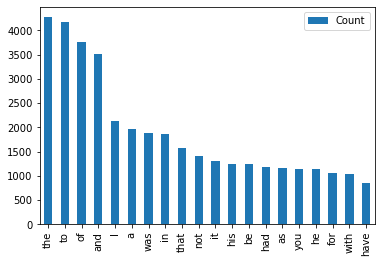

In [218]:
commonadded.head(20).plot.bar()

# The most common words are the ones used the most often in day to day english, including determiners like the, Pronouns like he and she, prepositions like with, etc.. 